In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi':200, 'bbox_inches': 'tight'}
# The previous configuration allows larger inline figures in Jupyter without changing output figure size.
# This is useful to keep figures at a consistent size for publishing.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from network_of_oscillators_Kuramoto_model import *
from network_of_oscillators_integrate_and_sync_quantifiers import *
from network_of_oscillators_plot_utils import *

from matplotlib_latex_configurations import *
rcParams['figure.figsize'] = (one_column_figure_size * golden_ration, one_column_figure_size)

In [3]:
# Reading natural frequencies of vertices w and edges of the coupling graph E, 
# and setting the kuramotoModel.

w=np.loadtxt('parameters/N0011_U001.Freq')
E=np.loadtxt('parameters/N0011_BA002_001.net')
kuramotoModel=KuramotoModel(w, E, c = 7.5)

In [4]:
theta0=np.loadtxt('parameters/N0011_R001.Ic')

Plotting coupling graph and natural frequencies

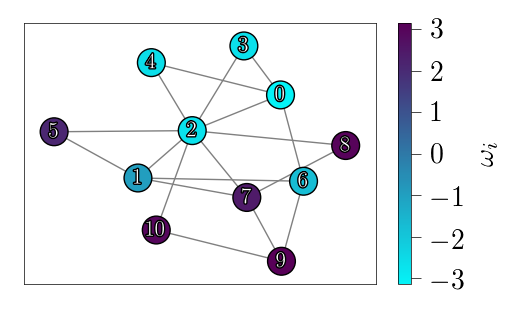

In [5]:
plot_coupling_graph(E, w)
plt.tight_layout()    
# plt.savefig("tex_example\\graph.pdf")

Numerical integration with time delay

In [6]:
%%time
kuramotoModel.tau = 0.1
out=integrate_and_measure(kuramotoModel, theta0, tf=100)
print(out['mean_r'], out['partial_sync'])
t, theta, r, psi = unpack_print(out)

0.607046364604 0.83895396724
Wall time: 11.3 s


Numerical integration without time delay

In [7]:
%%time
kuramotoModel.tau = 0
out=integrate_and_measure(kuramotoModel, theta0, tf=100)
print(out['mean_r'], out['partial_sync'])
t, theta, r, psi = unpack_print(out)
# odeint (without delay) is much faster than ddeint (with delay)
# Besides odeint has convergence order 3, while ddeint has 2, see convergencyOrderIntegration.ipynb

0.608875732019 0.837478104318
Wall time: 2.15 s


Plot time evolution of the order parameter

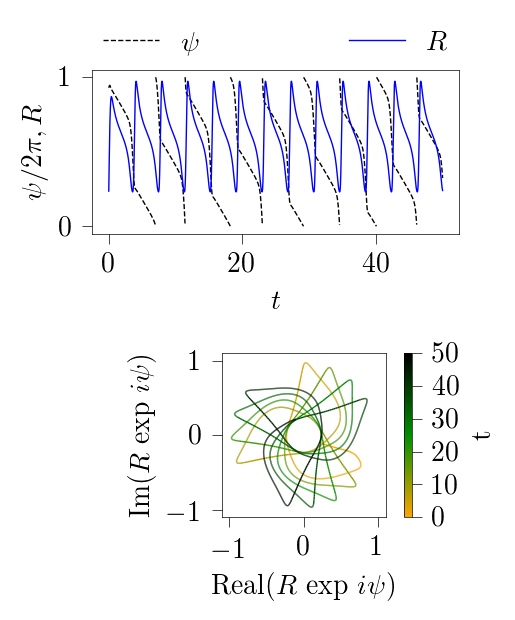

In [8]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(2.75, 3))

tlim = [0, 50]
plot_r_psi(t, r, psi, tlim = tlim, ax=ax1)
legend = ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., frameon=False)

plot_r_exp_psi(t, r, psi, tlim = tlim, ax=ax2)

plt.tight_layout()

# plt.savefig("tex_example\\orderParameter.pdf")

Plot phase variables

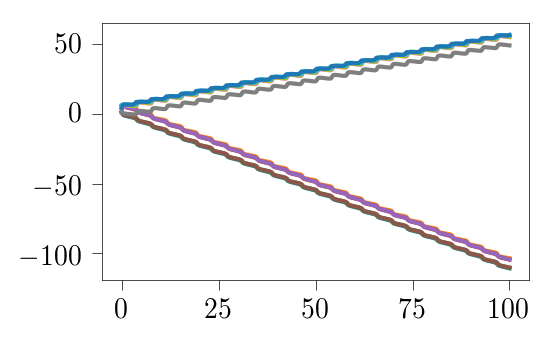

In [9]:
for i in range(len(w)):
    plt.plot(t, theta[:, i])

Plot phase variables in the unit circle

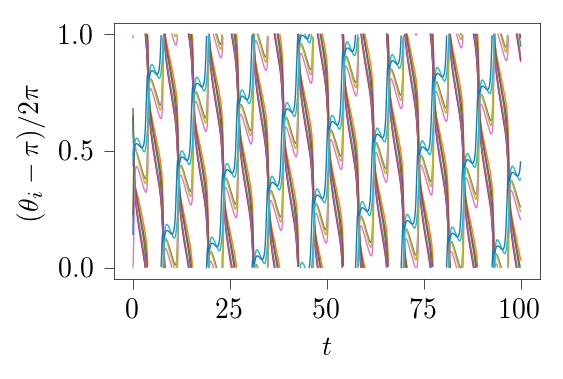

In [10]:
plot_phase_mod_2pi(t, theta)

Plot phase variables histogram in the unit circle

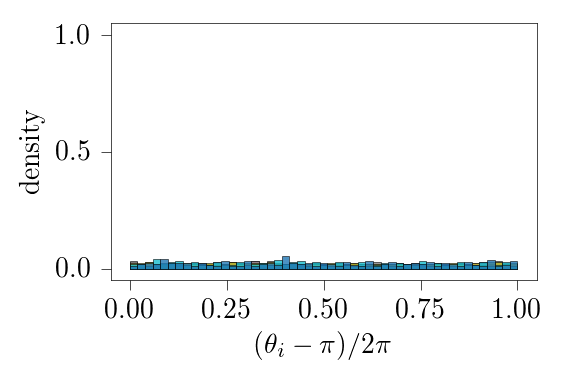

In [11]:
plot_phase_mod_2pi_histogram(theta)

Plot phase in the unit circles with more parameters

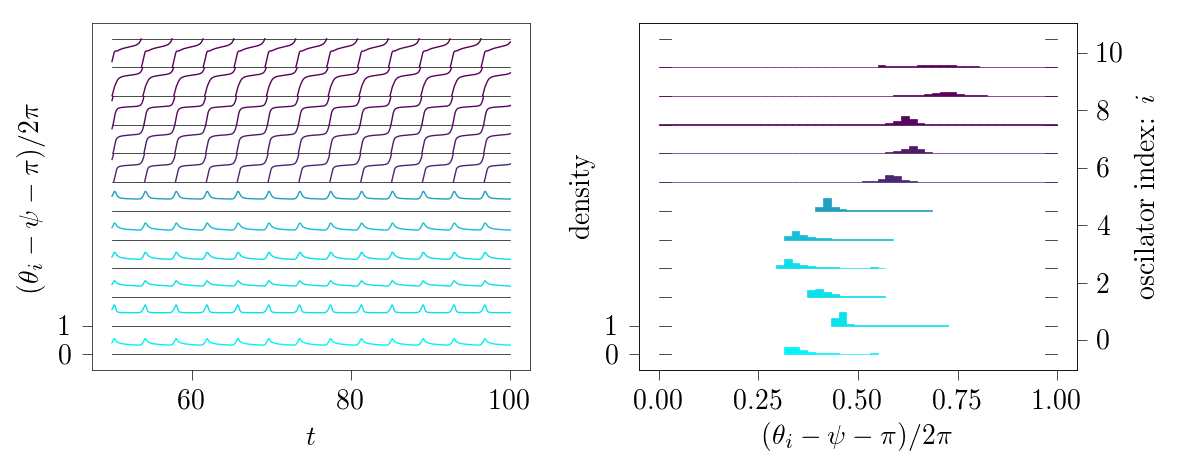

In [13]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(6,2.5))
sel = [0, 1, 9, 10]

plot_phase_mod_2pi(t, theta, psi, tlim = [50,100], 
                   color = frequency_to_color(w),
#                    sel = sel,
                   shift_axis = True,
                   show_right_ax_labels = False,
                   ax = ax1)

plot_phase_mod_2pi_histogram(theta, psi,
                    color = frequency_to_color(w),
#                     sel = sel,
                    shift_axis = True,
                    ax = ax2)

plt.tight_layout()
# plt.savefig("tex_example\\phaseVariables.pdf")

With the previous plot we can see that magenta oscillators (wi>0) exhibit phase slips in comparison with the mean phase psi, while blue oscillators (wi<0) fluctuate around mean phase.

Examples of plots increasing coupling parameters

In [34]:
#Increasing coupling parameter
def plot_increasing_c(c0, cf, cstep):
    out = {}
    for kuramotoModel.c in arange_(c0, cf, cstep):
        out_aux = integrate_and_measure(kuramotoModel, theta0, tf=100)
        out[kuramotoModel.c] = {'mean_r': out_aux['mean_r'], 'partial_sync': out_aux['partial_sync']}

    cs, partial_sync, mean_r = zip(*[ [c,  out[c]['partial_sync'],  out[c]['mean_r']] for c in out.keys()])
    fig, ax = plt.subplots(1, figsize=( one_column_figure_size * golden_ration,one_column_figure_size))
    ax.plot(cs,partial_sync, '-bo',  markersize=2, label=r'$S$ (partial sync)', linewidth = 0.5)
    ax.plot(cs,mean_r, '-ko', markersize=2, label=r'$R$', linewidth = 0.5)
    ax.set_xlabel(r'$c$')
    ax.set_ylabel(r'$S$,$R$')
    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0., frameon=False)
    ax.set_ylim([0, 1.1])

Wall time: 27.6 s


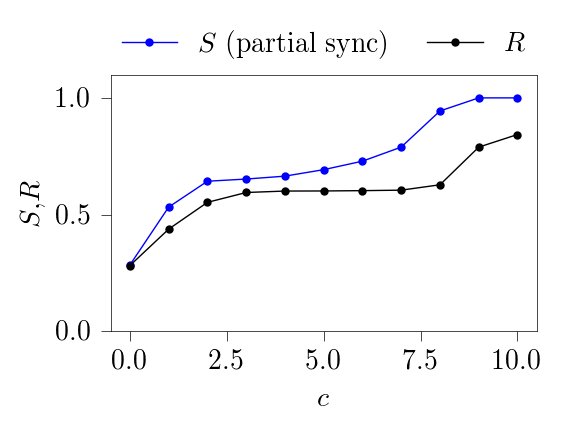

In [35]:
%%time
kuramotoModel.tau = 0
plot_increasing_c(0, 10, 1)
# plt.savefig("tex_example\\increasingCTau00.pdf")

Wall time: 2min 1s


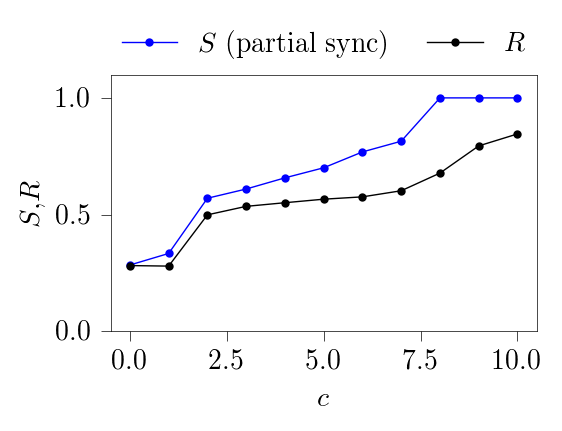

In [37]:
%%time
kuramotoModel.tau = 0.5
plot_increasing_c(0, 10, 1)
# plt.savefig("tex_example\\increasingCTau05.pdf")